In [1]:
# Start by importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## read the data file
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
##Now replacing zero value with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

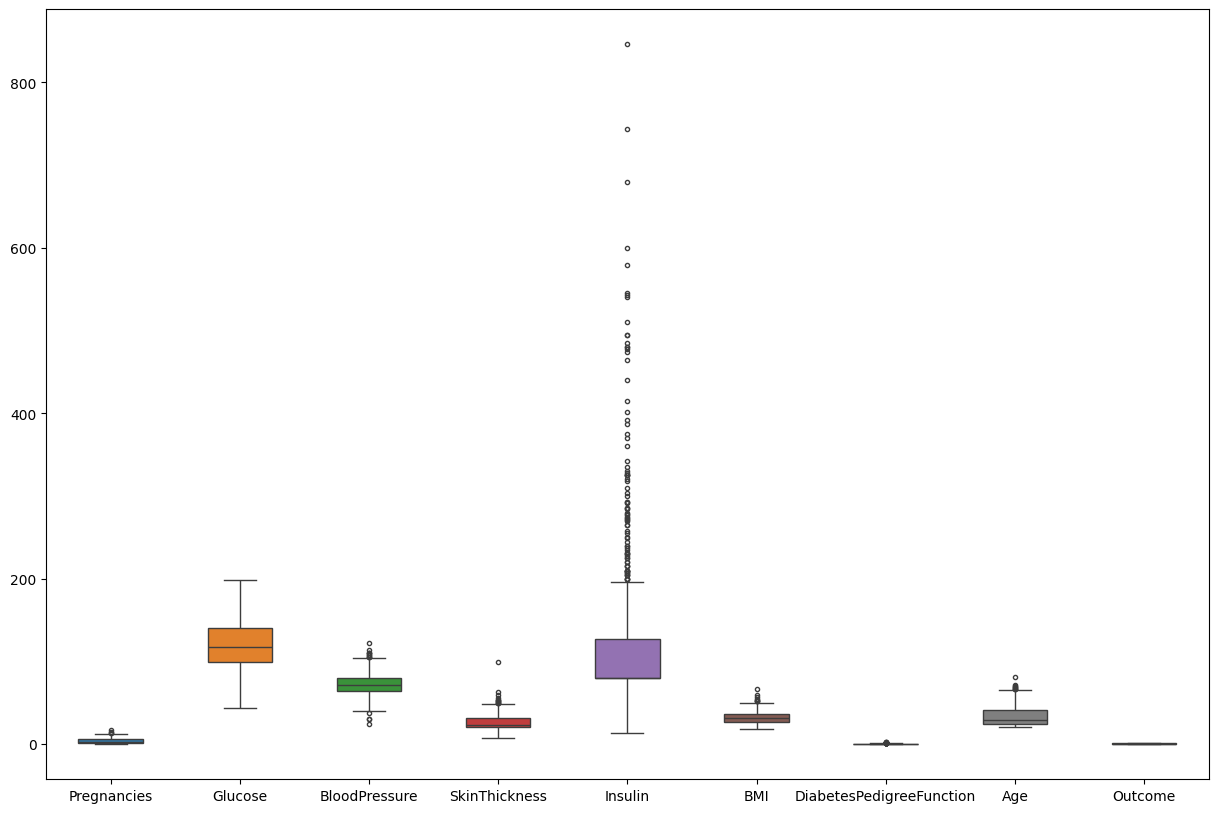

In [8]:
#now we have to dealt with the 0 values
# stll outliers may be present . lets find the outliers

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [11]:
## divide the data into dependent and independent variable
X= data.drop(columns=['Outcome'])
y=data['Outcome']

In [12]:
# seperate the dataset into train test split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((576, 8), (576,), (192, 8), (192,))

In [13]:
import pickle
def scaler_standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    file = open('StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return X_train_scaled,X_test_scaled

In [14]:
X_train_scaled, X_test_scaled = scaler_standard(X_train,X_test)

In [15]:
X_test_scaled

array([[-0.82986389,  2.56591881,  0.27922165, ...,  1.46903995,
         2.78665365, -0.96584853],
       [-0.53768687, -0.49968691,  0.11084355, ...,  0.13573925,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.53266275, -0.89942504, ...,  0.19308552,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.43304331, -1.06780314, ..., -1.03985921,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.20007091,  0.44759974, ..., -1.65633158,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.13280114,  0.44759974, ..., -0.72445475,
        -0.63396981,  0.28489057]])

Text(0.5, 1.0, 'X_train After Scaling')

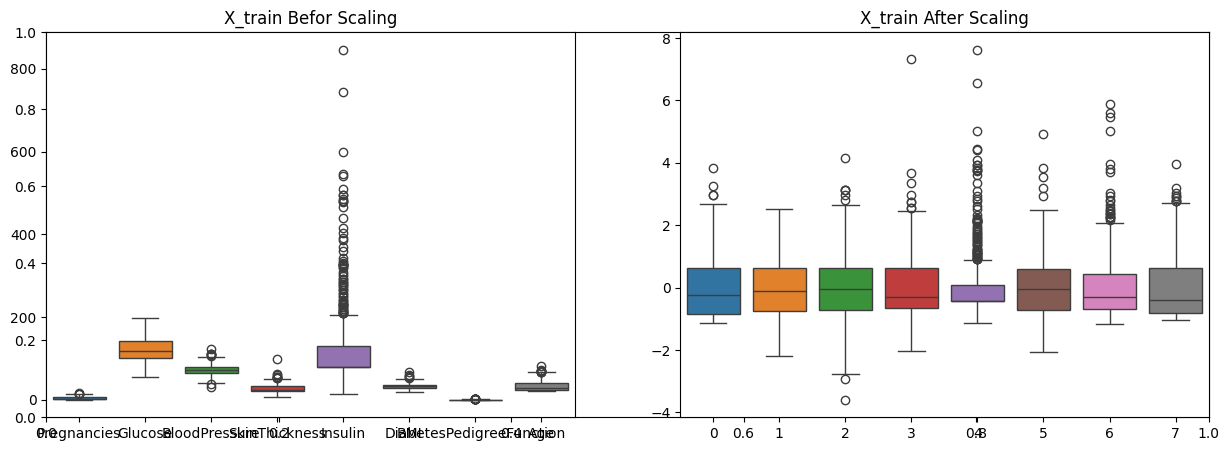

In [16]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Befor Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

In [17]:
log_reg = LogisticRegression()

In [18]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [19]:
## Hyper Parametric tuning
## Grid Search CV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
#parameters grid
parameters = {
    'penalty':['l1','l2','elasticnet'],
    'C': np.logspace(-3,3,7),
    'solver':['netwon-cg','lfbgs','liblinear']
}


In [21]:
log_reg =LogisticRegression()
clf =GridSearchCV(log_reg,param_grid=parameters,scoring='accuracy',cv=10)

In [22]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['netwon-cg', 'lfbgs', 'liblinear']},
             scoring='accuracy')

In [23]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [24]:
clf.best_score_

0.763793103448276

In [25]:
## lets see how our model performs on Test data

y_pred = clf.predict(X_test_scaled)

In [26]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
print(confusion_matrix(y_pred,y_test))

[[117  26]
 [ 13  36]]


In [28]:
print(accuracy_score(y_pred,y_test))

0.796875


In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       143
           1       0.58      0.73      0.65        49

    accuracy                           0.80       192
   macro avg       0.74      0.78      0.75       192
weighted avg       0.82      0.80      0.80       192



In [32]:
with open('ModelForPrediction.pkl','wb') as file:

    pickle.dump(log_reg,file)
file.close()


In [33]:
import pickle

# Charger le contenu du fichier .pkl
with open('ModelForPrediction.pkl', 'rb') as model_file:
    loaded_content = pickle.load(model_file)

# Afficher le type du contenu
print(type(loaded_content))

# Ajoutez des vérifications supplémentaires en fonction du type de modèle que vous avez enregistré
# Vous pouvez également imprimer ou explorer le contenu plus en détail pour mieux comprendre sa structure
print("Contenu du modèle :", loaded_content)


<class 'sklearn.linear_model._logistic.LogisticRegression'>
Contenu du modèle : LogisticRegression()


In [40]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ... (vous pouvez également mettre à l'échelle vos données ici si nécessaire)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = GridSearchCV(
    neighbors.KNeighborsClassifier(),  # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_scaled, y_train)
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Faire des prédictions sur l'ensemble de test avec le modèle optimisé
y_pred = clf.predict(X_test)

# Afficher les performances sur l'ensemble de test
print("Performance sur l'ensemble de test :")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 15}
Performance sur l'ensemble de test :
Accuracy Score: 0.3229166666666667
Confusion Matrix:
 [[  0 130]
 [  0  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.32      1.00      0.49        62

    accuracy                           0.32       192
   macro avg       0.16      0.50      0.24       192
weighted avg       0.10      0.32      0.16       192



In [41]:
# Charger le modèle depuis le fichier
with open('knn_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Faire des prédictions avec le modèle chargé
y_pred_loaded = loaded_model.predict(X_test_scaled)

# Afficher les performances sur l'ensemble de test avec le modèle chargé
print("Performance sur l'ensemble de test avec le modèle chargé:")
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_loaded))
# ... (plus de code pour la validation, etc.)


Performance sur l'ensemble de test avec le modèle chargé:
Accuracy Score: 0.7864583333333334


In [39]:
y_pred = clf.predict(X_test_scaled)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.786
